---Sales Forcasting using Linear Regression.

In [2]:
import pandas as pd
df = pd.read_csv("../data/processed/cleaned_superstore_sales.csv", parse_dates=['Order Date', 'Ship Date'])

Prepare the data for time-series analysis.

In [3]:
monthly_df = (
    df
    .set_index('Order Date')
    .resample('M')['Sales']
    .sum()
    .reset_index()
)

monthly_df.head()

C:\Users\holom\AppData\Local\Temp\ipykernel_22196\2971734699.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['Sales']


,Order Date,Sales
0,2015-01-31,14205.707
1,2015-02-28,4519.892
2,2015-03-31,55205.797
3,2015-04-30,27906.855
4,2015-05-31,23644.303


Transactional sales data was aggregated at a monthly level to reduce noise and make temporal patterns more suitable for modeling.

In [4]:
monthly_df['Sales_Lag_1'] = monthly_df['Sales'].shift(1)
monthly_df['Sales_Lag_2'] = monthly_df['Sales'].shift(2)
monthly_df['Sales_Lag_3'] = monthly_df['Sales'].shift(3)

monthly_df = monthly_df.dropna()


To incorporate historical information, lag-based features were created, to represent sales from previous months and act as predictors for the current month’s sales.

In [5]:
X = monthly_df[['Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_3']]
y = monthly_df['Sales']

split_index = int(len(monthly_df) * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


Train-Test Split. (80-20)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Model Training completed.

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse

(21254.713797026052, np.float64(29017.847268900754))

Quantifying prediction accuracy.

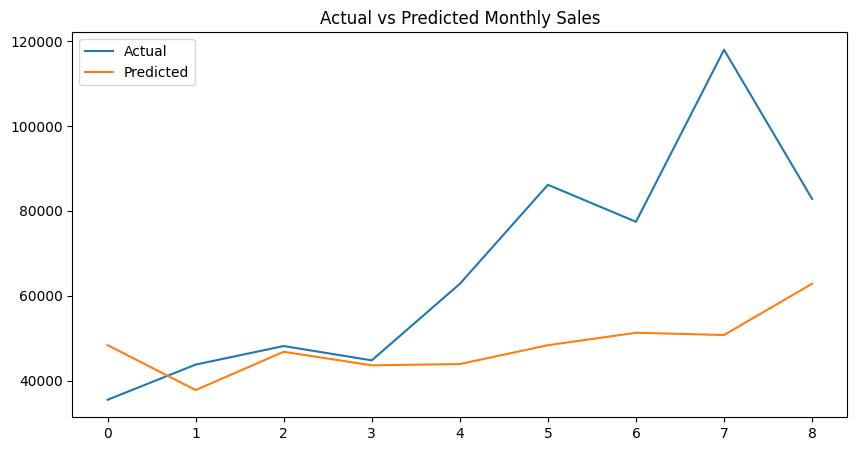

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Monthly Sales")
plt.show()

Visual assessment of model's performance.

In [9]:
import joblib

joblib.dump(model, "../models/sales_forecast_model.pkl")

['../models/sales_forecast_model.pkl']

Saving the trained model.